# Polynomial Regression

In [35]:
# import requried dependecies
import numpy as np                                      #for numerical calculation
import matplotlib.pyplot as plt                         #for data visualisation
from sklearn.preprocessing import PolynomialFeatures    #
from sklearn.linear_model import LinearRegression

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')


### Generate data from quadratic equation $$ y = ax^2 + bx + c$$

In [36]:
sample_size = 100                                        #define sample size
degree_poly = 2                                          #Order of poly = 2  
x = 6 * np.random.rand(sample_size, 1) - 3
y = 0.5 * x**2 + x + 2 +np.random.randn(sample_size, 1)
x_b = np.c_[np.ones((sample_size, 1)), x, x**2]          #add bias x0 = 1

x_new = np.array([[0], [2]])                             
x_new_b = np.c_[np.ones((2, 1)), x_new, x_new**2]


### Calculate $\hat{\theta}$ for qudratic data using normal equation $$\hat{\theta} = (X^T.X)^{-1}.X^T.y$$

In [37]:
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)   #normal equation
y_predict = x_b.dot(theta)                                #predict best fit line for quadratic data

Text(0.5, 1.0, 'Polynomial Regression')

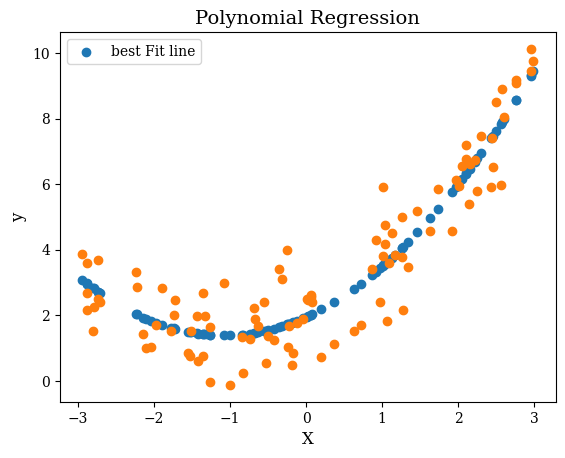

In [38]:
plt.scatter(x, y_predict, label= 'best Fit line') 
plt.scatter(x, y)                                          
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression')                                 

## Calculate $\theta^{(next~Step)}$ using gradient descent $$\theta^{(next~Step)} = \theta - \eta~\nabla_{\theta}~MSE_{(\theta)}$$

In [39]:
def fit_and_plot(eta, sample_size, n_iteration, x_b, y):
    theta = np.random.rand(x_b.shape[1],1)                          #random initialization of theta

    for i in range(n_iteration):                                    #iterate over range of number of iteration
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)   #calculating batch gradient
        theta = theta - eta * gradient                              #calculating next theta
        y_predict = x_b.dot(theta)                                  #predict value
        if i % 10 == 0: 
            plt.scatter(x, y_predict, label=f"epoch:{i}")            #plot predicted value
            plt.scatter(x, y)                                        #plot scatter plot of give input x, y
            plt.xlabel('x-axis')                               
            plt.ylabel('y-axis')                               
            plt.title(r"$\eta = $" +f'{eta}')                         #define plot title
            plt.legend()                                       
    print(f"Learning rate: {eta} | Final epoch theta: {theta[0], theta[1]}")

Learning rate: 0.001 | Final epoch theta: (array([0.670113]), array([1.01074059]))
Learning rate: 0.01 | Final epoch theta: (array([1.43444891]), array([1.0500555]))
Learning rate: 0.055 | Final epoch theta: (array([1.93852312]), array([1.05216515]))


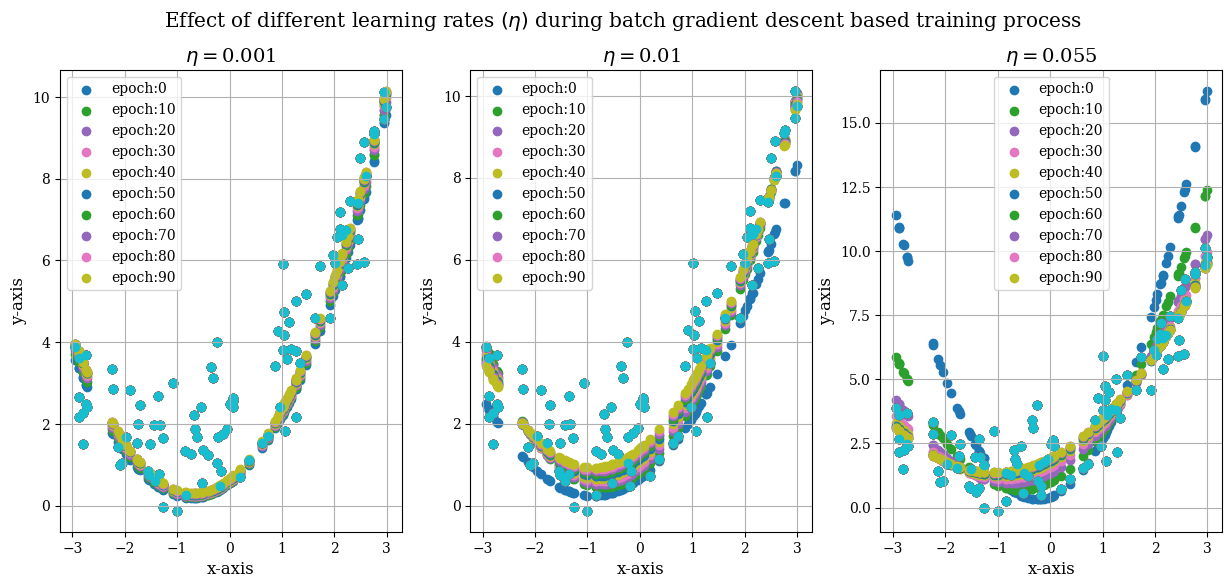

In [40]:
plt.figure(figsize=[15,6])
eta_list = [0.001, 0.01, 0.055]

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(eta_list[i-1], sample_size, 100, x_b, y)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\eta)$ during batch gradient descent based training process")

### Implemet polynomial regression using scikit learn

Model Intercept:  [1.94995418] 
Model Coefficient: [[0.         1.05220951 0.48778709]]


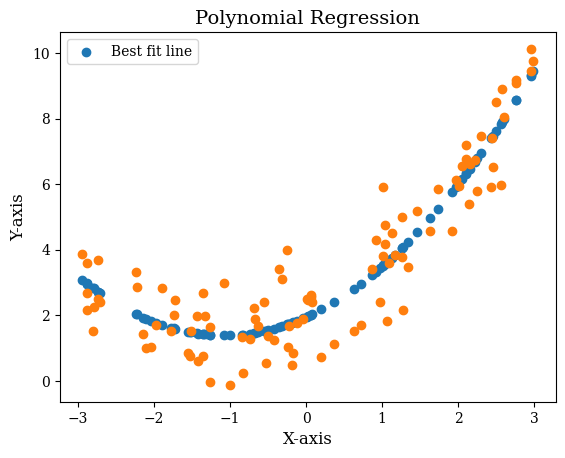

In [41]:
model = LinearRegression()                               #model creation
poly = PolynomialFeatures(2)                             #degree of freedom
x_poly = poly.fit_transform(x)                           #transform linear data into polynomial 
model.fit(x_poly, y)                                     #fit model on polynomial data
y_pred = model.predict(x_poly)                           #predict data

plt.scatter(x, y_pred, label = 'Best fit line')          #plot data on predicted value
plt.scatter(x, y)                                        #plot input value
plt.xlabel('X-axis')                                     #define x-axis
plt.ylabel('Y-axis')                                     #define y-axis
plt.legend()                                            
plt.title('Polynomial Regression')                       #define title for plot

print("Model Intercept: ", model.intercept_, "\nModel Coefficient:", model.coef_)  #print model coefficient and model intercept
